In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


from patch_input_box import *
from run_verifier import *
import os

GRB_LICENSE_FILE="/root/ERAN/gurobi912/linux64/gurobi.lic"
os.environ["GRB_LICENSE_FILE"] = GRB_LICENSE_FILE
print(os.environ.get("GRB_LICENSE_FILE"))

model_path = "/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx"
test_data_path = "/root/ERAN/data/mnist_test.csv"

images_dir = "/root/Projects/Nathan/Patch-Attack-Verification/images"

# Load the CSV
df = pd.read_csv(test_data_path, header=None)

# Extract labels and image pixels
labels = df.iloc[:, 0].values
pixels = df.iloc[:, 1:].values

/root/Projects/Nathan/Patch-Attack-Verification/util/ERAN/gurobi912/linux64/gurobi.lic
/root/ERAN/gurobi912/linux64/gurobi.lic


In [5]:
elapsed_time = verify_image(img_index=3, pixels=pixels,labels=labels, x_box=8, y_box=10, size_box=5, timeout_milp=3000) # 7 size box gives adv example

ERAN run completed in 0:00:11.374046
Last MILP status = 6 (CUTOFF)
dominant_class:  0
No adversarial example returned


In [6]:
elapsed_time, last_status, failed_labels, example, is_adversarial = verify_image_with_sub_splits(
                img_index=2,
                pixels=pixels,
                labels=labels,
                x_box=0,
                y_box=0,
                size_box=5,
                timeout_milp=30,
				split_pixels_count=4,
				is_random=True,
				# split_pixels_list=[0,1,5,10],
				# split_value=0.4
            )

Splitting on pixels: [(2, 4), (3, 3), (1, 3), (3, 1)]
(2, 4)
[[0, 0.5], [0.5, 1]]
(3, 3)
[[0, 0.5], [0.5, 1]]
(1, 3)
[[0, 0.5], [0.5, 1]]
(3, 1)
[[0, 0.5], [0.5, 1]]
ERAN run completed in 0:00:52.828360
Last MILP status = None (UNKNOWN)
No adversarial example returned
Sub-verification result: Elapsed time: 0:00:52.828360, Last MILP status: None (UNKNOWN), Is adversarial: False



Log file: /root/Projects/Nathan/Patch-Attack-Verification/logs/20260120/20260120_151718_eran_run.log
ERAN run completed in 0:14:35.500464
Last MILP status = 11 (INTERRUPTED)
Predicted class for adversarial example: 2
Failed labels during verification using network: [2]
Original label: 0


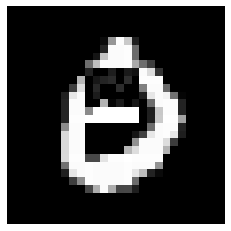

In [2]:
elapsed_time, last_status, failed_labels, example, is_adversarial = verify_image(
                img_index=3,
                pixels=pixels,
                labels=labels,
                x_box=8,
                y_box=10,
                size_box=7,
                timeout_milp=30000,
				with_plots=True,
                ul=1.0,
                add_bool_constraints=True,
                use_refine_poly=False,
                bounds=[[0,0.3], [0.3,0.7], [0.7,1.0]],
            )